In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
df.drop(columns= ['RowNumber','CustomerId','Surname'], inplace = True)

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first= True)

In [20]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [22]:
x = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [23]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [24]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [25]:
x_train.shape

(8000, 11)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [31]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(3, activation = 'sigmoid', input_dim = 11))
model.add(Dense(1, activation= 'sigmoid'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

In [53]:
history = model.fit(x_train_scaled, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4139 - val_loss: 0.4189
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4131 - val_loss: 0.4179
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4123 - val_loss: 0.4171
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4115 - val_loss: 0.4163
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4107 - val_loss: 0.4154
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4098 - val_loss: 0.4144
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4089 - val_loss: 0.4135
Epoch 8/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4079 - val_loss: 0.4124
Epoch 9/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4068 - val_loss: 0.4111
Epoch 10/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4057 - val_loss: 0.4099

In [48]:
model.layers[0].get_weights()

[array([[ 0.14380555,  0.02555672, -0.15367384],
        [-2.8676927 , -0.5331967 ,  1.3608626 ],
        [ 0.01819574,  0.21569163,  0.20927083],
        [ 0.04646946, -0.44358706,  0.2103948 ],
        [-0.11518519, -0.18653059, -0.9494728 ],
        [ 0.00864285,  0.03558292, -0.16819954],
        [ 0.00701109,  1.3041931 , -0.4561655 ],
        [ 0.137378  , -0.0738096 ,  0.2949079 ],
        [-0.25053754, -0.76445204,  0.3656301 ],
        [-0.09011466,  0.04675419,  0.19972189],
        [ 0.13265179,  0.4977855 , -0.5242091 ]], dtype=float32),
 array([ 0.5197963 ,  0.5708944 , -0.47533908], dtype=float32)]

In [49]:
model.layers[1].get_weights()

[array([[-1.3663436 ],
        [-1.5802057 ],
        [ 0.97308344]], dtype=float32),
 array([-0.3194041], dtype=float32)]

In [50]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [51]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [52]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.82

In [54]:
import matplotlib.pyplot as plt 

In [55]:
history.history

{'loss': [0.41387641429901123,
  0.4130803346633911,
  0.41230717301368713,
  0.4114815592765808,
  0.4107033908367157,
  0.4098360538482666,
  0.4088515341281891,
  0.40788009762763977,
  0.40684032440185547,
  0.4057287871837616],
 'val_loss': [0.41885843873023987,
  0.41794338822364807,
  0.4170871078968048,
  0.41626545786857605,
  0.41538289189338684,
  0.4144091308116913,
  0.41348594427108765,
  0.41236671805381775,
  0.41112223267555237,
  0.40989574790000916]}

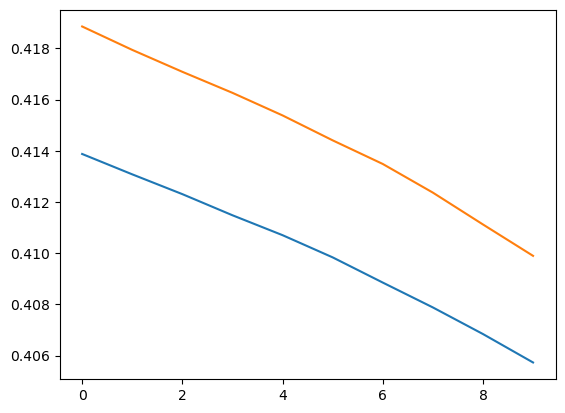

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])